# Please scroll down, starting from Activation Function section, you will see my answers

# A3: TensorBoard

## About

In this assignment, you will design and run experiments to evaluate the impact of a few common parameters (like the choice of activation function, optimizer, and weight initialization strategy) and visualize the results in TensorBoard.

The starter code below shows the mechanics of using TensorBoard in Colab. Unlike the previous assignments, a limited amount of starter code is provided.  3c is an extra credit question, it's optional (you can receive full credit on this assignment without submitting it).

## Questions

### 3a. 
**Implement ReLU and compare against a previous activation function**.

The year is 2010. It is not commonly known that ReLU is a useful alternative to activation functions like Sigmoid or Tanh (nor has ReLU been implemented in the library you're using). Create a DNN to classify MNIST, and provide your own implementation of ReLU (instead of using a built-in method). Design and run an experiment to compare ReLU against other methods, and use TensorBoard to display your results. What differences do you observe, and why?

### 3b. 

**Optimizer and initalizer and soup**.

Do optimizers like Momentum or Adam really make a difference? How about different weight initialize strategies (like random normal, or glorot uniform?) Design and run experiments to find out, and use TensorBoard to display your results. What differences do you observe, and why?

### 3c. Extra credit (optional)

**Demonstrate the vanishing gradient problem**. 

Implement an especially deep neural network and train it on a simple dataset like MNIST. Choose activation functions, initialization strategies, and an optimizer that are likely to cause this behavior. Produce histograms of activations and gradients at various layers during training. What do you see? Next, adjust the parameters above to correct this behavior. Visualize and compare the results.

## Submission instructions

Please submit your assignment on CourseWorks by uploading a zip file that includes:

* A Jupyter notebook, containing complete code to reproduce your experiments, and saved output showing your results.

* A README file (plaintext is fine). This should contain your written conclusions for each question. These can be brief (a couple paragraphs). Try to be specific in your answers (if ReLU outperfoms sigmoid, try to answer why).

* Plots / diagrams (.jpgs). Since it is not convenient to save TensorBoard diagrams directly in a Jupyter notebook, you can take screenshots of your plots and submit them along with your Jupyter notebook in a zip file on CourseWorks. Please name your diagrams appropriately, and refer to them names in your notebook.

If you are working in Colab, you can prepare your notebook for submission by ensuring that runs end-to-end, then saving and downloading it:

1. ```Runtime -> Restart and run all```
1. ```File -> Save```
1. ```File -> Download.ipynb```

## Starter code for TensorBoard

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
assert tf.__version__ >= "2.0"

In [424]:
%load_ext tensorboard 

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


**Caution**. The following cell will clear the logs directory. If you're running this on your local machine, be careful executing it.

In [0]:
!rm -rf ./tensorboard-logs/ # Clear any logs from previous runs

Import a dataset

In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train, x_test = x_train / 255.0, x_test / 255.0

## First style

Define a simple model

In [0]:
from tensorflow.keras.layers import Dense, Flatten

def create_model():
  model = tf.keras.models.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='softmax'),
  ])
  return model

Create a logs directory

In [428]:
import datetime 
import os
date = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = os.path.join("./tensorboard-logs/", date)
print("Writing logs to", log_dir)

Writing logs to ./tensorboard-logs/20191029-205044


### Run an experiment

In [429]:
from tensorflow.keras.optimizers import SGD

model = create_model() 
opt = SGD(learning_rate=0.001, momentum=0.0, nesterov=False) 
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

exp_dir = os.path.join(log_dir, "exp1")

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=exp_dir)

model.fit(x_train,
          y_train,
          epochs=1, 
          validation_data=(x_test, y_test), 
          callbacks=[tb_callback])

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 7s 116us/sample - loss: 2.5442 - accuracy: 0.5350 - val_loss: 1.4496 - val_accuracy: 0.7670


### Run a second experiment

In [430]:
model = create_model() 
opt = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

exp_dir = os.path.join(log_dir, "exp2")

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=exp_dir)

model.fit(x_train,
          y_train,
          epochs=10, 
          validation_data=(x_test, y_test), 
          callbacks=[tb_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.9034 - accuracy: 0.8101 - val_loss: 0.4831 - val_accuracy: 0.8805
Epoch 2/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.4593 - accuracy: 0.8806 - val_loss: 0.4013 - val_accuracy: 0.8940
Epoch 3/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.4051 - accuracy: 0.8910 - val_loss: 0.3686 - val_accuracy: 0.9015
Epoch 4/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3784 - accuracy: 0.8967 - val_loss: 0.3497 - val_accuracy: 0.9062
Epoch 5/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3613 - accuracy: 0.9004 - val_loss: 0.3368 - val_accuracy: 0.9091
Epoch 6/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.3494 - accuracy: 0.9036 - val_loss: 0.3276 - val_accuracy: 0.9118
Epoch 7/10
60000/60000 [==========================

### Start TensorBoard and compare the results

## Second style
Using a Subclassed model and a GradientTape

Prepre the dataset

In [0]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
train_ds = train_ds.shuffle(60000).batch(32)
test_ds = test_ds.batch(32)

Define a simple model

In [0]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten = Flatten(input_shape=(28, 28))
    self.d1 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    return self.d1(x)

model = MyModel()

In [0]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [0]:
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')
train_loss = tf.keras.metrics.Mean(name='train_loss')
test_loss = tf.keras.metrics.Mean(name='test_loss')

Training and testing routines

In [0]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_fn(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_fn(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

Prepare log writers (previously, these were handled by the callback)

In [436]:
date = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = os.path.join("./tensorboard-logs/", date)
print("Writing logs to", log_dir)

train_writer = tf.summary.create_file_writer(os.path.join(log_dir, "train"))
test_writer = tf.summary.create_file_writer(os.path.join(log_dir, "test"))

Writing logs to ./tensorboard-logs/20191029-205155


Train and log summaries

In [437]:
EPOCHS = 2

for epoch in range(EPOCHS):
  
  for images, labels in train_ds:
    train_step(images, labels)
    
  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))
  
  with train_writer.as_default():
    tf.summary.scalar('accuracy', train_accuracy.result(), step=epoch)
    tf.summary.scalar('loss', train_loss.result(), step=epoch)

    # ====
    # Demo: show how to use histogram summaries
    # Create and log some random data
    # Useful if you're attemping the extra credit question
    # ====
    data = tf.random.normal((32, 100))
    tf.summary.histogram('random', 
                         data,
                         step=epoch, 
                         description='Your description')
    
  with test_writer.as_default():
    tf.summary.scalar('accuracy', test_accuracy.result(), step=epoch)
    tf.summary.scalar('loss', test_loss.result(), step=epoch)
    
  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

Epoch 1, Loss: 0.4652763605117798, Accuracy: 87.80999755859375, Test Loss: 0.3063490390777588, Test Accuracy: 91.63999938964844
Epoch 2, Loss: 0.3039413094520569, Accuracy: 91.56666564941406, Test Loss: 0.28554728627204895, Test Accuracy: 92.07999420166016


In [438]:
%tensorboard --logdir "$log_dir"

# Part 1. Activation Functions

### 3a. 
**Implement ReLU and compare against a previous activation function**.

The year is 2010. It is not commonly known that ReLU is a useful alternative to activation functions like Sigmoid or Tanh (nor has ReLU been implemented in the library you're using). Create a DNN to classify MNIST, and provide your own implementation of ReLU (instead of using a built-in method). Design and run an experiment to compare ReLU against other methods, and use TensorBoard to display your results. What differences do you observe, and why?

I will first implement Relu and run 3 trials for the most popular activation functions. 

1. My implementation of Relu
2. Tanh
3. Sigmoid



In [0]:
!rm -rf ./tensorboard-logs/ # Clear any logs from previous runs

Import a dataset

In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
train_ds = train_ds.shuffle(60000).batch(32)
test_ds = test_ds.batch(32)

Define a relu activation function

In [0]:
def my_relu(x, alpha=0.0, max_value=None, threshold=0.0):
  return tf.math.maximum(x,tf.zeros(x.shape))

In [0]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten = Flatten(input_shape=(28, 28))
    self.d1 = Dense(10)
    self.d2 = Dense(10)
    self.d3 = Dense(10, activation = 'softmax')
    

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    x = my_relu(x)
    x = self.d2(x)
    x = my_relu(x)
    return self.d3(x)
  
model = MyModel()


In [0]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [0]:
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')
train_loss = tf.keras.metrics.Mean(name='train_loss')
test_loss = tf.keras.metrics.Mean(name='test_loss')

Training and testing routines

In [0]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_fn(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_fn(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

Prepare log writers (previously, these were handled by the callback)

In [447]:
date = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = os.path.join("./tensorboard-logs/", date)
print("Writing logs to", log_dir)
exp_dir = os.path.join(log_dir, "relu")

train_writer = tf.summary.create_file_writer(os.path.join(exp_dir, "train"))
test_writer = tf.summary.create_file_writer(os.path.join(exp_dir, "test"))

Writing logs to ./tensorboard-logs/20191029-205209


Train and log summaries

In [448]:
EPOCHS = 5

for epoch in range(EPOCHS):
  
  for images, labels in train_ds:
    train_step(images, labels)
    
  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))
  
  with train_writer.as_default():
    tf.summary.scalar('accuracy', train_accuracy.result(), step=epoch)
    tf.summary.scalar('loss', train_loss.result(), step=epoch)

    # ====
    # Demo: show how to use histogram summaries
    # Create and log some random data
    # Useful if you're attemping the extra credit question
    # ====
    data = tf.random.normal((32, 100))
    tf.summary.histogram('random', 
                         data,
                         step=epoch, 
                         description='Your description')
    
  with test_writer.as_default():
    tf.summary.scalar('accuracy', test_accuracy.result(), step=epoch)
    tf.summary.scalar('loss', test_loss.result(), step=epoch)
    
  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

Epoch 1, Loss: 0.5306733846664429, Accuracy: 84.66500091552734, Test Loss: 0.32465100288391113, Test Accuracy: 90.58999633789062
Epoch 2, Loss: 0.30427291989326477, Accuracy: 91.41999816894531, Test Loss: 0.2798433303833008, Test Accuracy: 92.08999633789062
Epoch 3, Loss: 0.2750680446624756, Accuracy: 92.20832824707031, Test Loss: 0.27094700932502747, Test Accuracy: 92.02999877929688
Epoch 4, Loss: 0.25651854276657104, Accuracy: 92.66166687011719, Test Loss: 0.2621849775314331, Test Accuracy: 92.22999572753906
Epoch 5, Loss: 0.24128377437591553, Accuracy: 93.13999938964844, Test Loss: 0.2505202889442444, Test Accuracy: 92.87999725341797


Running Tanh

In [0]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten = Flatten(input_shape=(28, 28))
    self.d1 = Dense(10, activation = 'tanh')
    self.d2 = Dense(10, activation = 'tanh')
    self.d3 = Dense(10, activation = 'softmax')
    

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    x = self.d2(x)
    return self.d3(x)
  
model = MyModel()


In [0]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [0]:
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')
train_loss = tf.keras.metrics.Mean(name='train_loss')
test_loss = tf.keras.metrics.Mean(name='test_loss')

In [0]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_fn(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_fn(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

Prepare log writers (previously, these were handled by the callback)

In [0]:
exp_dir = os.path.join(log_dir, "tanh")
train_writer = tf.summary.create_file_writer(os.path.join(exp_dir, "train"))
test_writer = tf.summary.create_file_writer(os.path.join(exp_dir, "test"))

Train and log summaries

In [454]:
EPOCHS = 5

for epoch in range(EPOCHS):
  
  for images, labels in train_ds:
    train_step(images, labels)
    
  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))
  
  with train_writer.as_default():
    tf.summary.scalar('accuracy', train_accuracy.result(), step=epoch)
    tf.summary.scalar('loss', train_loss.result(), step=epoch)

    # ====
    # Demo: show how to use histogram summaries
    # Create and log some random data
    # Useful if you're attemping the extra credit question
    # ====
    data = tf.random.normal((32, 100))
    tf.summary.histogram('random', 
                         data,
                         step=epoch, 
                         description='Your description')
    
  with test_writer.as_default():
    tf.summary.scalar('accuracy', test_accuracy.result(), step=epoch)
    tf.summary.scalar('loss', test_loss.result(), step=epoch)
    
  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

Epoch 1, Loss: 0.6247983574867249, Accuracy: 84.37833404541016, Test Loss: 0.35505181550979614, Test Accuracy: 90.4800033569336
Epoch 2, Loss: 0.3182063698768616, Accuracy: 91.24166107177734, Test Loss: 0.290274053812027, Test Accuracy: 92.0999984741211
Epoch 3, Loss: 0.27654829621315, Accuracy: 92.22166442871094, Test Loss: 0.2810467481613159, Test Accuracy: 92.18000030517578
Epoch 4, Loss: 0.2588479518890381, Accuracy: 92.66666412353516, Test Loss: 0.2705027759075165, Test Accuracy: 92.27999877929688
Epoch 5, Loss: 0.24592912197113037, Accuracy: 92.90166473388672, Test Loss: 0.26797130703926086, Test Accuracy: 92.36000061035156


Running Sigmoid

In [0]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten = Flatten(input_shape=(28, 28))
    self.d1 = Dense(10, activation = 'sigmoid')
    self.d2 = Dense(10, activation = 'sigmoid')
    self.d3 = Dense(10, activation = 'softmax')
    

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    x = self.d2(x)
    return self.d3(x)
  
model = MyModel()


In [0]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [0]:
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')
train_loss = tf.keras.metrics.Mean(name='train_loss')
test_loss = tf.keras.metrics.Mean(name='test_loss')

In [0]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_fn(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_fn(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

Prepare log writers (previously, these were handled by the callback)

In [0]:
exp_dir = os.path.join(log_dir, "sigmoid")

train_writer = tf.summary.create_file_writer(os.path.join(exp_dir, "train_sigmoid"))
test_writer = tf.summary.create_file_writer(os.path.join(exp_dir, "test_sigmoid"))

Train and log summaries

In [460]:
EPOCHS = 5

for epoch in range(EPOCHS):
  
  for images, labels in train_ds:
    train_step(images, labels)
    
  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))
  
  with train_writer.as_default():
    tf.summary.scalar('accuracy', train_accuracy.result(), step=epoch)
    tf.summary.scalar('loss', train_loss.result(), step=epoch)

    # ====
    # Demo: show how to use histogram summaries
    # Create and log some random data
    # Useful if you're attemping the extra credit question
    # ====
    data = tf.random.normal((32, 100))
    tf.summary.histogram('random', 
                         data,
                         step=epoch, 
                         description='Your description')
    
  with test_writer.as_default():
    tf.summary.scalar('accuracy', test_accuracy.result(), step=epoch)
    tf.summary.scalar('loss', test_loss.result(), step=epoch)
    
  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

Epoch 1, Loss: 1.4744197130203247, Accuracy: 62.17333221435547, Test Loss: 0.9238422513008118, Test Accuracy: 81.55000305175781
Epoch 2, Loss: 0.7018621563911438, Accuracy: 85.23332977294922, Test Loss: 0.5482260584831238, Test Accuracy: 87.12999725341797
Epoch 3, Loss: 0.4684363305568695, Accuracy: 88.72000122070312, Test Loss: 0.41762325167655945, Test Accuracy: 89.24000549316406
Epoch 4, Loss: 0.3746112287044525, Accuracy: 90.21666717529297, Test Loss: 0.36158299446105957, Test Accuracy: 89.9000015258789
Epoch 5, Loss: 0.32900744676589966, Accuracy: 91.0816650390625, Test Loss: 0.332383394241333, Test Accuracy: 90.83999633789062


Running Relu(built-in)

In [0]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten = Flatten(input_shape=(28, 28))
    self.d1 = Dense(10, activation = 'relu')
    self.d2 = Dense(10, activation = 'relu')
    self.d3 = Dense(10, activation = 'softmax')
    

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    x = self.d2(x)
    return self.d3(x)
  
model = MyModel()


In [0]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [0]:
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')
train_loss = tf.keras.metrics.Mean(name='train_loss')
test_loss = tf.keras.metrics.Mean(name='test_loss')

In [0]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_fn(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_fn(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

Prepare log writers (previously, these were handled by the callback)

In [0]:
exp_dir = os.path.join(log_dir, "relu(built-in)")

train_writer = tf.summary.create_file_writer(os.path.join(exp_dir, "train_sigmoid"))
test_writer = tf.summary.create_file_writer(os.path.join(exp_dir, "test_sigmoid"))

Train and log summaries

In [466]:
EPOCHS = 5

for epoch in range(EPOCHS):
  
  for images, labels in train_ds:
    train_step(images, labels)
    
  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))
  
  with train_writer.as_default():
    tf.summary.scalar('accuracy', train_accuracy.result(), step=epoch)
    tf.summary.scalar('loss', train_loss.result(), step=epoch)

    # ====
    # Demo: show how to use histogram summaries
    # Create and log some random data
    # Useful if you're attemping the extra credit question
    # ====
    data = tf.random.normal((32, 100))
    tf.summary.histogram('random', 
                         data,
                         step=epoch, 
                         description='Your description')
    
  with test_writer.as_default():
    tf.summary.scalar('accuracy', test_accuracy.result(), step=epoch)
    tf.summary.scalar('loss', test_loss.result(), step=epoch)
    
  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

Epoch 1, Loss: 0.6467837691307068, Accuracy: 80.83833312988281, Test Loss: 0.34676527976989746, Test Accuracy: 90.31999969482422
Epoch 2, Loss: 0.31481799483299255, Accuracy: 90.99666595458984, Test Loss: 0.26775500178337097, Test Accuracy: 92.08999633789062
Epoch 3, Loss: 0.27290764451026917, Accuracy: 92.20999908447266, Test Loss: 0.24902066588401794, Test Accuracy: 92.55999755859375
Epoch 4, Loss: 0.25029149651527405, Accuracy: 92.79666900634766, Test Loss: 0.2345554530620575, Test Accuracy: 93.0999984741211
Epoch 5, Loss: 0.23757301270961761, Accuracy: 93.07500457763672, Test Loss: 0.2299991399049759, Test Accuracy: 93.27999877929688


In [467]:
%tensorboard --logdir "$log_dir"

# Part 2.a Optimizer

**Optimizer and initalizer and soup**.

Do optimizers like Momentum or Adam really make a difference? How about different weight initialize strategies (like random normal, or glorot uniform?) Design and run experiments to find out, and use TensorBoard to display your results. What differences do you observe, and why?

In [0]:
!rm -rf ./tensorboard-logs/ # Clear any logs from previous runs

Import a dataset

In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train, x_test = x_train / 255.0, x_test / 255.0

Define a relu activation function

In [0]:
def create_model():
  model = tf.keras.models.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(10, activation = 'relu'),
    Dense(10, activation = 'relu'),
    Dense(10, activation='softmax'),
  ])
  return model

Create a logs directory

In [471]:
date = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = os.path.join("./tensorboard-logs/", date)
print("Writing logs to", log_dir)

Writing logs to ./tensorboard-logs/20191029-205346


### Run an experiment with SGD solver

In [0]:
from tensorflow.keras.optimizers import SGD, Adam, Adadelta

In [473]:

model = create_model() 
opt = SGD(learning_rate=0.001, momentum=0.0, nesterov=False) 
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

exp_dir = os.path.join(log_dir, "SGD")

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=exp_dir)

model.fit(x_train,
          y_train,
          epochs=10, 
          validation_data=(x_test, y_test), 
          callbacks=[tb_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 120us/sample - loss: 2.1875 - accuracy: 0.2463 - val_loss: 2.0310 - val_accuracy: 0.3107
Epoch 2/10
60000/60000 [==============================] - 7s 112us/sample - loss: 1.8486 - accuracy: 0.3648 - val_loss: 1.6562 - val_accuracy: 0.4103
Epoch 3/10
60000/60000 [==============================] - 7s 114us/sample - loss: 1.4554 - accuracy: 0.5484 - val_loss: 1.2551 - val_accuracy: 0.6456
Epoch 4/10
60000/60000 [==============================] - 7s 110us/sample - loss: 1.1194 - accuracy: 0.6882 - val_loss: 0.9960 - val_accuracy: 0.7235
Epoch 5/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.9201 - accuracy: 0.7404 - val_loss: 0.8425 - val_accuracy: 0.7609
Epoch 6/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.7953 - accuracy: 0.7710 - val_loss: 0.7412 - val_accuracy: 0.7861
Epoch 7/10
60000/60000 [==========================

### Run a second experiment with SGD solver again but with higher momentum 

In [474]:
model = create_model() 
opt = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

exp_dir = os.path.join(log_dir, "SGD, higher momentum")

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=exp_dir)

model.fit(x_train,
          y_train,
          epochs=10, 
          validation_data=(x_test, y_test), 
          callbacks=[tb_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.8959 - accuracy: 0.7251 - val_loss: 0.4169 - val_accuracy: 0.8787
Epoch 2/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.3869 - accuracy: 0.8898 - val_loss: 0.3340 - val_accuracy: 0.9026
Epoch 3/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.3342 - accuracy: 0.9052 - val_loss: 0.3073 - val_accuracy: 0.9124
Epoch 4/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.3100 - accuracy: 0.9123 - val_loss: 0.2907 - val_accuracy: 0.9191
Epoch 5/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.2923 - accuracy: 0.9171 - val_loss: 0.2797 - val_accuracy: 0.9208
Epoch 6/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.2792 - accuracy: 0.9195 - val_loss: 0.2732 - val_accuracy: 0.9226
Epoch 7/10
60000/60000 [==========================

### Run a Third Experiment with Adam Solver

In [475]:
model = create_model() 
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

exp_dir = os.path.join(log_dir, "Adam")

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=exp_dir)

model.fit(x_train,
          y_train,
          epochs=10, 
          validation_data=(x_test, y_test), 
          callbacks=[tb_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.6209 - accuracy: 0.8201 - val_loss: 0.3751 - val_accuracy: 0.8944
Epoch 2/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3226 - accuracy: 0.9072 - val_loss: 0.2778 - val_accuracy: 0.9228
Epoch 3/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.2660 - accuracy: 0.9244 - val_loss: 0.2547 - val_accuracy: 0.9281
Epoch 4/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2417 - accuracy: 0.9305 - val_loss: 0.2331 - val_accuracy: 0.9345
Epoch 5/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.2266 - accuracy: 0.9347 - val_loss: 0.2472 - val_accuracy: 0.9257
Epoch 6/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.2166 - accuracy: 0.9385 - val_loss: 0.2424 - val_accuracy: 0.9327
Epoch 7/10
60000/60000 [==========================

### Run a Fourth Experiment with AdaDelta Solver

In [476]:
model = create_model() 
opt = Adadelta(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

exp_dir = os.path.join(log_dir, "AdaDelta")

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=exp_dir)

model.fit(x_train,
          y_train,
          epochs=10, 
          validation_data=(x_test, y_test), 
          callbacks=[tb_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 127us/sample - loss: 2.2989 - accuracy: 0.1023 - val_loss: 2.2916 - val_accuracy: 0.1121
Epoch 2/10
60000/60000 [==============================] - 7s 118us/sample - loss: 2.2848 - accuracy: 0.1225 - val_loss: 2.2781 - val_accuracy: 0.1325
Epoch 3/10
60000/60000 [==============================] - 7s 118us/sample - loss: 2.2701 - accuracy: 0.1400 - val_loss: 2.2624 - val_accuracy: 0.1478
Epoch 4/10
60000/60000 [==============================] - 7s 116us/sample - loss: 2.2537 - accuracy: 0.1531 - val_loss: 2.2451 - val_accuracy: 0.1599
Epoch 5/10
60000/60000 [==============================] - 7s 122us/sample - loss: 2.2357 - accuracy: 0.1641 - val_loss: 2.2265 - val_accuracy: 0.1707
Epoch 6/10
60000/60000 [==============================] - 7s 117us/sample - loss: 2.2169 - accuracy: 0.1737 - val_loss: 2.2075 - val_accuracy: 0.1787
Epoch 7/10
60000/60000 [==========================

### Start TensorBoard and compare the results

In [477]:
%tensorboard --logdir "$log_dir"

### Part 2.b Initialization

In [0]:
from tensorflow.keras.initializers import Ones, Zeros, RandomNormal, GlorotUniform

In [0]:
!rm -rf ./tensorboard-logs/ # Clear any logs from previous runs

Import a dataset

In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train, x_test = x_train / 255.0, x_test / 255.0

Define a relu activation function

In [0]:
def create_model():
  model = tf.keras.models.Sequential([
      
    Flatten(input_shape=(28, 28)),
    Dense(10, activation = 'relu', kernel_initializer = Ones()),
    Dense(10, activation = 'relu'),
    Dense(10, activation='softmax'),
  ])
  return model

Create a logs directory

In [482]:
date = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = os.path.join("./tensorboard-logs/", date)
print("Writing logs to", log_dir)

Writing logs to ./tensorboard-logs/20191029-205837


### Run an experiment with ones as initialization

In [483]:
model = create_model() 
opt = SGD(learning_rate=0.001, momentum=0.9, nesterov=True) 
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

exp_dir = os.path.join(log_dir, "ones")

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=exp_dir)
model.fit(x_train,
          y_train,
          epochs=10, 
          validation_data=(x_test, y_test), 
          callbacks=[tb_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 128us/sample - loss: 2.5023 - accuracy: 0.1112 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/10
60000/60000 [==============================] - 7s 116us/sample - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/10
60000/60000 [==============================] - 7s 115us/sample - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/10
60000/60000 [==============================] - 7s 118us/sample - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/10
60000/60000 [==============================] - 7s 116us/sample - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/10
60000/60000 [==============================] - 7s 115us/sample - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/10
60000/60000 [==========================

### Run a second experiment with glorot uniform as initialization

In [0]:
def create_model():
  model = tf.keras.models.Sequential([
      
    Flatten(input_shape=(28, 28)),
    Dense(10, activation = 'relu', kernel_initializer = GlorotUniform()),
    Dense(10, activation = 'relu'),
    Dense(10, activation='softmax'),
  ])
  return model

In [485]:
model = create_model() 
opt = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

exp_dir = os.path.join(log_dir, "glorot")

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=exp_dir)

model.fit(x_train,
          y_train,
          epochs=10, 
          validation_data=(x_test, y_test), 
          callbacks=[tb_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 123us/sample - loss: 1.0507 - accuracy: 0.6625 - val_loss: 0.4864 - val_accuracy: 0.8602
Epoch 2/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.4412 - accuracy: 0.8741 - val_loss: 0.3814 - val_accuracy: 0.8909
Epoch 3/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.3649 - accuracy: 0.8963 - val_loss: 0.3343 - val_accuracy: 0.9027
Epoch 4/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.3259 - accuracy: 0.9075 - val_loss: 0.3174 - val_accuracy: 0.9083
Epoch 5/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.3021 - accuracy: 0.9131 - val_loss: 0.2929 - val_accuracy: 0.9147
Epoch 6/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2854 - accuracy: 0.9179 - val_loss: 0.2855 - val_accuracy: 0.9170
Epoch 7/10
60000/60000 [==========================

### Run a third experiment with zeros as initialization

In [0]:
def create_model():
  model = tf.keras.models.Sequential([
      
    Flatten(input_shape=(28, 28)),
    Dense(10, activation = 'relu', kernel_initializer = Zeros()),
    Dense(10, activation = 'relu'),
    Dense(10, activation='softmax'),
  ])
  return model

In [487]:
model = create_model() 
opt = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

exp_dir = os.path.join(log_dir, "zeros")

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=exp_dir)

model.fit(x_train,
          y_train,
          epochs=10, 
          validation_data=(x_test, y_test), 
          callbacks=[tb_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 126us/sample - loss: 2.3016 - accuracy: 0.1120 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/10
60000/60000 [==============================] - 7s 124us/sample - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/10
60000/60000 [==============================] - 8s 129us/sample - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/10
60000/60000 [==============================] - 7s 116us/sample - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/10
60000/60000 [==============================] - 7s 114us/sample - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/10
60000/60000 [==============================] - 7s 120us/sample - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/10
60000/60000 [==========================

In [488]:
%tensorboard --logdir "$log_dir"

### 3c. Extra credit (optional)

**Demonstrate the vanishing gradient problem**. 

Implement an especially deep neural network and train it on a simple dataset like MNIST. Choose activation functions, initialization strategies, and an optimizer that are likely to cause this behavior. Produce histograms of activations and gradients at various layers during training. What do you see? Next, adjust the parameters above to correct this behavior. Visualize and compare the results.

In [0]:
!rm -rf ./tensorboard-logs/ # Clear any logs from previous runs

Import a dataset

In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
def create_model():
  model = tf.keras.models.Sequential([
      
    Flatten(input_shape=(28, 28)),
    Dense(100, activation = 'sigmoid'),
    Dense(100, activation = 'sigmoid'),
    Dense(100, activation = 'sigmoid'),
    Dense(100, activation = 'sigmoid'),
    Dense(100, activation = 'sigmoid'),
    Dense(100, activation = 'sigmoid'),
    Dense(100, activation = 'sigmoid'),
    Dense(100, activation = 'sigmoid'),
    Dense(100, activation = 'sigmoid'),
    Dense(100, activation = 'sigmoid'),
    Dense(10, activation='softmax')
  ])
  return model

Create a logs directory

In [492]:
date = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = os.path.join("./tensorboard-logs/", date)
print("Writing logs to", log_dir)

Writing logs to ./tensorboard-logs/20191029-210216


### Run an experiment with a very deep NN with Sigmoid Function

In [493]:
model = create_model() 
opt = SGD(learning_rate=0.001, momentum=0.00, nesterov=False) 
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

exp_dir = os.path.join(log_dir, "sigmoid_hist")

tb_callback = tf.keras.callbacks.TensorBoard(log_dir = exp_dir, histogram_freq=1, write_graph=True, write_images=True, write_grads = True)

model.fit(x_train,
          y_train,
          epochs=10, 
          validation_data=(x_test, y_test), 
          callbacks=[tb_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 178us/sample - loss: 2.3383 - accuracy: 0.1067 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 2/10
60000/60000 [==============================] - 9s 158us/sample - loss: 2.3014 - accuracy: 0.1121 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/10
60000/60000 [==============================] - 9s 158us/sample - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 4/10
60000/60000 [==============================] - 9s 155us/sample - loss: 2.3014 - accuracy: 0.1122 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/10
60000/60000 [==============================] - 9s 158us/sample - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/10
60000/60000 [==============================] - 9s 158us/sample - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/10
60000/60000 [=========================

### Experiment 2. Use Relu Activation with a very deep NN




In [0]:
def create_model():
  model = tf.keras.models.Sequential([
      
    Flatten(input_shape=(28, 28)),
    Dense(100, activation = 'relu'),
    Dense(100, activation = 'relu'),
    Dense(100, activation = 'relu'),
    Dense(100, activation = 'relu'),
    Dense(100, activation = 'relu'),
    Dense(100, activation = 'relu'),
    Dense(100, activation = 'relu'),
    Dense(100, activation = 'relu'),
    Dense(100, activation = 'relu'),
    Dense(100, activation = 'relu'),
    Dense(10, activation='softmax')
  ])
  return model

### Run an experiment

In [495]:
model = create_model() 
opt = SGD(learning_rate=0.001, momentum=0.00, nesterov=False) 
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

exp_dir = os.path.join(log_dir, "relu_hist")

tb_callback = tf.keras.callbacks.TensorBoard(log_dir = exp_dir, histogram_freq=1, write_graph=True, write_images=True, write_grads = True)

model.fit(x_train,
          y_train,
          epochs=10, 
          validation_data=(x_test, y_test), 
          callbacks=[tb_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 179us/sample - loss: 2.3009 - accuracy: 0.1227 - val_loss: 2.2980 - val_accuracy: 0.1330
Epoch 2/10
60000/60000 [==============================] - 10s 163us/sample - loss: 2.2957 - accuracy: 0.1278 - val_loss: 2.2924 - val_accuracy: 0.1364
Epoch 3/10
60000/60000 [==============================] - 10s 161us/sample - loss: 2.2888 - accuracy: 0.1455 - val_loss: 2.2826 - val_accuracy: 0.1810
Epoch 4/10
60000/60000 [==============================] - 10s 161us/sample - loss: 2.2740 - accuracy: 0.2218 - val_loss: 2.2591 - val_accuracy: 0.3050
Epoch 5/10
60000/60000 [==============================] - 9s 157us/sample - loss: 2.2309 - accuracy: 0.3541 - val_loss: 2.1789 - val_accuracy: 0.4068
Epoch 6/10
60000/60000 [==============================] - 9s 156us/sample - loss: 2.0032 - accuracy: 0.4039 - val_loss: 1.6403 - val_accuracy: 0.5145
Epoch 7/10
60000/60000 [======================

In [496]:
%tensorboard --logdir "$log_dir"

### 3.3b Observe Gradients Starting with Sigmoid

In [0]:
!rm -rf ./tensorboard-logs/ # Clear any logs from previous runs

Import a dataset

In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
train_ds = train_ds.shuffle(60000).batch(32)
test_ds = test_ds.batch(32)

In [0]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten = Flatten(input_shape=(28, 28))
    self.d1 = Dense(100, activation = 'sigmoid')
    self.d2 = Dense(100, activation = 'sigmoid')
    self.d3 = Dense(100, activation = 'sigmoid')
    self.d4 = Dense(100, activation = 'sigmoid')
    self.d5 = Dense(100, activation = 'sigmoid')
    self.d6 = Dense(100, activation = 'sigmoid')
    self.d7 = Dense(100, activation = 'sigmoid')
    self.d8 = Dense(100, activation = 'sigmoid')
    self.d9 = Dense(100, activation = 'sigmoid')
    self.d10 = Dense(100, activation = 'sigmoid')
    self.d11 = Dense(100, activation = 'sigmoid')
    self.d12 = Dense(100, activation = 'sigmoid')
    self.d13 = Dense(100, activation = 'sigmoid')
    self.d14 = Dense(100, activation = 'sigmoid')
    self.d15 = Dense(100, activation = 'sigmoid')
    self.d16 = Dense(100, activation = 'sigmoid')
    self.d17 = Dense(100, activation = 'sigmoid')
    self.d18 = Dense(100, activation = 'sigmoid')
    self.d19 = Dense(100, activation = 'sigmoid')
    self.d20 = Dense(100, activation = 'sigmoid')
    self.d21 = Dense(10, activation = 'softmax')
    

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    x = self.d2(x)
    x = self.d3(x)
    x = self.d4(x)
    x = self.d5(x)
    x = self.d6(x)
    x = self.d7(x)
    x = self.d8(x)
    x = self.d9(x)
    x = self.d10(x)
    x = self.d11(x)
    x = self.d12(x)
    x = self.d13(x)
    x = self.d14(x)
    x = self.d15(x)
    x = self.d16(x)
    x = self.d17(x)
    x = self.d18(x)
    x = self.d19(x)
    x = self.d20(x)
    return self.d21(x)
  
model = MyModel()


In [0]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [0]:
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')
train_loss = tf.keras.metrics.Mean(name='train_loss')
test_loss = tf.keras.metrics.Mean(name='test_loss')
gradient = tf.keras.metrics.Mean(name='gradient')

Training and testing routines

In [0]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_fn(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  gradients_list.append(gradients)
  gradient(gradients[1])
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  train_loss(loss)
  train_accuracy(labels, predictions)

@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_fn(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

Prepare log writers (previously, these were handled by the callback)

In [504]:
date = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = os.path.join("./tensorboard-logs/", date)
print("Writing logs to", log_dir)
exp_dir = os.path.join(log_dir, "sigmoid")

train_writer = tf.summary.create_file_writer(os.path.join(exp_dir, "train"))
test_writer = tf.summary.create_file_writer(os.path.join(exp_dir, "test"))

Writing logs to ./tensorboard-logs/20191029-210549


Train and log summaries

In [505]:
EPOCHS = 10
gradients_list_sigmoid = list()
for epoch in range(EPOCHS):
  
  for images, labels in train_ds:
    train_step(images, labels)
    
  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}, Gradient: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100,
                        gradient.result()))
  gradients_list_sigmoid.append(gradient.result())
  
  with train_writer.as_default():
    tf.summary.scalar('accuracy', train_accuracy.result(), step=epoch)
    tf.summary.scalar('loss', train_loss.result(), step=epoch)
    
    # ====
    # Demo: show how to use histogram summaries
    # Create and log some random data
    # Useful if you're attemping the extra credit question
    # ====
    data = gradient.result()
    tf.summary.histogram('gradient', 
                         data,
                         step=epoch, 
                         description='Gradient')
    
  with test_writer.as_default():
    tf.summary.scalar('accuracy', test_accuracy.result(), step=epoch)
    tf.summary.scalar('loss', test_loss.result(), step=epoch)
    
  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

Epoch 1, Loss: 2.3107540607452393, Accuracy: 10.220000267028809, Test Loss: 2.3073275089263916, Test Accuracy: 11.350000381469727, Gradient: -7.788556458328835e-18
Epoch 2, Loss: 2.3073623180389404, Accuracy: 10.460000038146973, Test Loss: 2.308603048324585, Test Accuracy: 11.350000381469727, Gradient: -4.717657533212458e-18
Epoch 3, Loss: 2.304349184036255, Accuracy: 10.633333206176758, Test Loss: 2.301701545715332, Test Accuracy: 11.350000381469727, Gradient: -3.306694410145284e-18
Epoch 4, Loss: 2.3019251823425293, Accuracy: 11.065000534057617, Test Loss: 2.3013241291046143, Test Accuracy: 11.350000381469727, Gradient: -2.55932597335566e-18
Epoch 5, Loss: 2.301515579223633, Accuracy: 11.208333015441895, Test Loss: 2.301358938217163, Test Accuracy: 11.350000381469727, Gradient: -2.055819480133407e-18
Epoch 6, Loss: 2.3014285564422607, Accuracy: 11.236666679382324, Test Loss: 2.3012146949768066, Test Accuracy: 11.350000381469727, Gradient: -1.7150237560985505e-18
Epoch 7, Loss: 2.3014

### Run Second Experiment on Relu for Gradients

In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
train_ds = train_ds.shuffle(60000).batch(32)
test_ds = test_ds.batch(32)

In [0]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten = Flatten(input_shape=(28, 28))
    self.d1 = Dense(100, activation = 'relu')
    self.d2 = Dense(100, activation = 'relu')
    self.d3 = Dense(100, activation = 'relu')
    self.d4 = Dense(100, activation = 'relu')
    self.d5 = Dense(100, activation = 'relu')
    self.d6 = Dense(100, activation = 'relu')
    self.d7 = Dense(100, activation = 'relu')
    self.d8 = Dense(100, activation = 'relu')
    self.d9 = Dense(100, activation = 'relu')
    self.d10 = Dense(100, activation = 'relu')
    self.d11 = Dense(100, activation = 'relu')
    self.d12 = Dense(100, activation = 'relu')
    self.d13 = Dense(100, activation = 'relu')
    self.d14 = Dense(100, activation = 'relu')
    self.d15 = Dense(100, activation = 'relu')
    self.d16 = Dense(100, activation = 'relu')
    self.d17 = Dense(100, activation = 'relu')
    self.d18 = Dense(100, activation = 'relu')
    self.d19 = Dense(100, activation = 'relu')
    self.d20 = Dense(100, activation = 'relu')
    self.d21 = Dense(100, activation = 'softmax')
    

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    x = self.d2(x)
    x = self.d3(x)
    x = self.d4(x)
    x = self.d5(x)
    x = self.d6(x)
    x = self.d7(x)
    x = self.d8(x)
    x = self.d9(x)
    x = self.d10(x)
    x = self.d11(x)
    x = self.d12(x)
    x = self.d13(x)
    x = self.d14(x)
    x = self.d15(x)
    x = self.d16(x)
    x = self.d17(x)
    x = self.d18(x)
    x = self.d19(x)
    x = self.d20(x)
    return self.d21(x)
  
model = MyModel()


In [0]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [0]:
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')
train_loss = tf.keras.metrics.Mean(name='train_loss')
test_loss = tf.keras.metrics.Mean(name='test_loss')
gradient = tf.keras.metrics.Mean(name='gradient')

Training and testing routines

In [0]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_fn(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  gradients_list.append(gradients)
  gradient(gradients[1])
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  train_loss(loss)
  train_accuracy(labels, predictions)

@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_fn(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

Prepare log writers (previously, these were handled by the callback)

In [0]:
exp_dir = os.path.join(log_dir, "relu")

train_writer = tf.summary.create_file_writer(os.path.join(exp_dir, "train"))
test_writer = tf.summary.create_file_writer(os.path.join(exp_dir, "test"))

Train and log summaries

In [513]:
EPOCHS = 10
gradients_list_relu = list()
for epoch in range(EPOCHS):
  
  for images, labels in train_ds:
    train_step(images, labels)
    
  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}, Gradient: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100,
                        gradient.result()))
  
  gradients_list_relu.append(gradient.result())
  with train_writer.as_default():
    tf.summary.scalar('gradient', gradient.result(), step=epoch)
    
    
    # ====
    # Demo: show how to use histogram summaries
    # Create and log some random data
    # Useful if you're attemping the extra credit question
    # ====
    data = gradient.result()
    tf.summary.histogram('gradient', 
                         data,
                         step=epoch, 
                         description='Gradient')
    
  with test_writer.as_default():
    tf.summary.scalar('accuracy', test_accuracy.result(), step=epoch)
    tf.summary.scalar('loss', test_loss.result(), step=epoch)
    
  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

Epoch 1, Loss: 1.0104414224624634, Accuracy: 63.7833366394043, Test Loss: 0.4007866680622101, Test Accuracy: 88.62000274658203, Gradient: 0.00013746661716140807
Epoch 2, Loss: 0.3316991627216339, Accuracy: 91.09667205810547, Test Loss: 0.25157395005226135, Test Accuracy: 93.58000183105469, Gradient: 9.528292139293626e-05
Epoch 3, Loss: 0.267437607049942, Accuracy: 93.02999877929688, Test Loss: 0.2687624990940094, Test Accuracy: 93.66000366210938, Gradient: 7.013735012151301e-05
Epoch 4, Loss: 0.24027717113494873, Accuracy: 93.76499938964844, Test Loss: 0.19441461563110352, Test Accuracy: 95.02000427246094, Gradient: 0.00018885750614572316
Epoch 5, Loss: 0.18163403868675232, Accuracy: 95.40167236328125, Test Loss: 0.18364568054676056, Test Accuracy: 95.44000244140625, Gradient: 0.0001584183773957193
Epoch 6, Loss: 0.16513343155384064, Accuracy: 95.92499542236328, Test Loss: 0.16160379350185394, Test Accuracy: 96.05000305175781, Gradient: 0.00013911932182963938
Epoch 7, Loss: 0.158272042

In [0]:
import matplotlib.pyplot as plt
import numpy as np
relu_grads = [i.numpy() for i in gradients_list_relu]
sigmoid_grads = [i.numpy() for i in gradients_list_sigmoid]

Text(0, 0.5, 'Average Gradients')

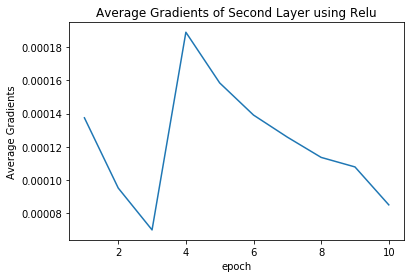

In [515]:
plt.plot(np.linspace(1,10,10),relu_grads)
plt.title('Average Gradients of Second Layer using Relu')
plt.xlabel('epoch')
plt.ylabel('Average Gradients')

Text(0, 0.5, 'Average Gradients')

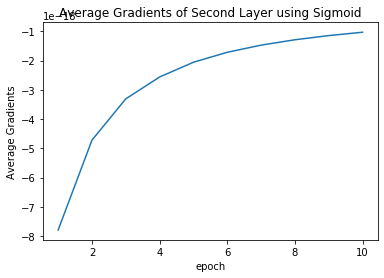

In [516]:
plt.plot(np.linspace(1,10,10),sigmoid_grads)
plt.title('Average Gradients of Second Layer using Sigmoid')
plt.xlabel('epoch')
plt.ylabel('Average Gradients')

In [517]:
%tensorboard --logdir "$log_dir"